In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

from copy import deepcopy

# Questão 1
 

In [2]:
data = np.array([[0,0,0], [0,0,1], [0,1,0], [0,1,1],
              [1,0,0],[1,0,1],[1,1,0],[1,1,1]])

data.shape

(8, 3)

In [3]:
classes = np.array( [i for i in range(data.shape[0])] ).T

In [4]:
data = np.column_stack((data,classes))
data

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 2],
       [0, 1, 1, 3],
       [1, 0, 0, 4],
       [1, 0, 1, 5],
       [1, 1, 0, 6],
       [1, 1, 1, 7]])

In [5]:
df = pd.DataFrame(data, columns=['x_1','x_2','x_3','class'])
df

,x_1,x_2,x_3,class
0,0,0,0,0
1,0,0,1,1
2,0,1,0,2
3,0,1,1,3
4,1,0,0,4
5,1,0,1,5
6,1,1,0,6
7,1,1,1,7


In [6]:
def create_noise_df(df, number_new_data):#criar dataframe com ruido
    new_df = deepcopy(df)
    values = new_df[['x_1','x_2','x_3']].values
    
    for k in range(number_new_data):#criando ruido

        noise = np.array([np.random.uniform(-0.1,0.1) for i in range(24)]).reshape(8,3)

        new_values = values + noise

        for i in range(len(new_values)):#preencher novo data frame com os valores x1 x2 x3
            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],new_values[i][2],i]
    
    return new_df

In [7]:
noise_df = create_noise_df(df, 100)
noise_df = noise_df.sort_values(by=['class'])
noise_df

,x_1,x_2,x_3,class
0,0.000000,0.000000,0.000000,0.0
608,-0.057632,0.095457,-0.033162,0.0
160,-0.079109,-0.087894,-0.052549,0.0
600,-0.062602,-0.047604,-0.099478,0.0
168,-0.040656,-0.026860,-0.042505,0.0
...,...,...,...,...
615,1.043905,1.095510,1.078157,7.0
151,1.064402,1.006565,0.941364,7.0
623,0.968159,1.006819,0.956160,7.0
215,0.902591,0.943081,1.030374,7.0


In [8]:
#criando x e y para perceptron 
x = noise_df[['x_1','x_2','x_3']].values
y = noise_df[['class']].values.ravel()
#train_test_split para separar a instancia em test e treino
#estamos usando 30% como treino
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train.shape , x_test.shape

((565, 3), (243, 3))

# Perceptron

In [9]:
model = Perceptron()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [10]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        33
         3.0       1.00      1.00      1.00        30
         4.0       1.00      1.00      1.00        39
         5.0       1.00      1.00      1.00        28
         6.0       1.00      1.00      1.00        31
         7.0       1.00      1.00      1.00        28

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243

Matriz de confusão: 

[[28  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0]
 [ 0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 28]]


# Questão 2:
## Letra A

In [11]:
porta = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

In [12]:
df = pd.DataFrame(porta, columns=['x_0','x_1','saida'])

In [13]:
df

,x_0,x_1,saida
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
# Retirado o disturbio como pedido pelo professor

'''def create_noise_xor(df, number_new_dados):
    new_df = df.copy()
    values = new_df[['x_0','x_1']].values

    for passo in range(number_new_dados):
        
        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(8)]).reshape(4,2)
        new_values = values + ruido

        for i in range(len(new_values)):
            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],i]
            
    return new_df
x_xor = df[['x_0','x_1']].values
y_xor = df[['saida']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(x_xor,y_xor, test_size=0.3)

X_train.shape,X_test.shape
    '''

"def create_noise_xor(df, number_new_dados):\n    new_df = df.copy()\n    values = new_df[['x_0','x_1']].values\n\n    for passo in range(number_new_dados):\n        \n        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(8)]).reshape(4,2)\n        new_values = values + ruido\n\n        for i in range(len(new_values)):\n            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],i]\n            \n    return new_df\nx_xor = df[['x_0','x_1']].values\ny_xor = df[['saida']].values.ravel()\n\nX_train, X_test, y_train, y_test = train_test_split(x_xor,y_xor, test_size=0.3)\n\nX_train.shape,X_test.shape\n    "

In [15]:
X_train = x_xor = df[['x_0','x_1']].values
y_train = y_xor = df[['saida']].values.ravel()

In [16]:
#camada unica com 100 neuronios (padrão)
model = MLPClassifier(activation='relu', max_iter=1000)

In [17]:
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [18]:
y_pred = model.predict(X_train)

In [19]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Letra B

In [20]:
x = np.logspace(np.log10(1),np.log10(10),100).reshape(-1,1)
y = np.log10(x).reshape(-1,1)

In [21]:
#delimitando o intervalo entre 1,10 de forma igual para todos
x = MinMaxScaler(feature_range=(1, 10)).fit_transform(x.astype(np.float64))

In [22]:
#divisão test e train
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [23]:
regr = MLPRegressor(max_iter=1000).fit(X_train, y_train.ravel())#treino usado para ver o error

In [24]:
# 3 camadas com 100 neuronios cada
regr1 = MLPRegressor(max_iter=1000,hidden_layer_sizes=(100,100,100)).fit(x, y.ravel())# usando todos os dados para prever todos os dados paara o plot

In [25]:
y_pred1 = regr1.predict(x)

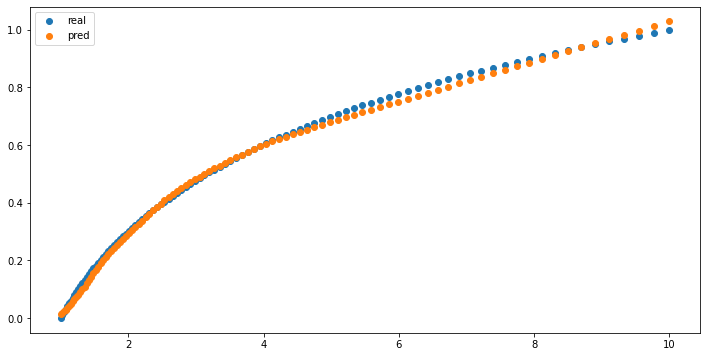

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(x,y,label = 'real')
plt.scatter(x,y_pred1,label = 'pred')
plt.legend(loc='best')
plt.show()

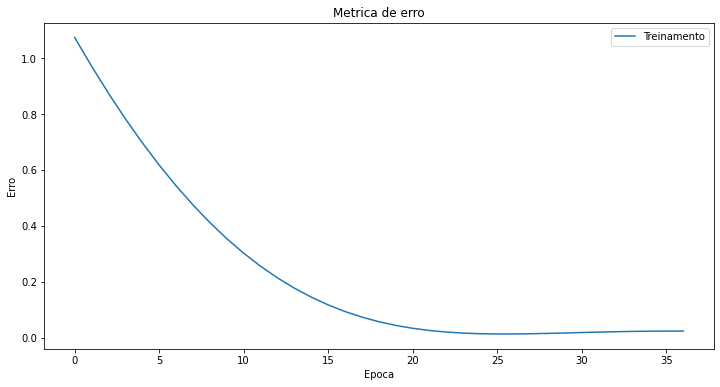

In [27]:
#plot do erro
plt.figure(figsize=(12,6))
plt.plot(regr.loss_curve_)
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [28]:
print('Error atual:',regr.loss_)
print('Melhor erro:',regr.best_loss_)

Error atual: 0.023193460757652374
Melhor erro: 0.012802420961371382


### Como a biblioteca não fornece a curva de erro para validação usei o erro médio quadrático 

In [29]:
x_train_pred = regr.predict(X_train)
x_test_pred = regr.predict(X_test)

In [30]:
print(f"Train MSE : {0.5*np.mean((y_train-x_train_pred)**2)}")
print(f"Test MSE : {0.5*np.mean((y_test-x_test_pred)**2)}")

Train MSE : 0.09633116541335934
Test MSE : 0.09855148148681153


## Letra c

In [31]:
#corrigir

In [32]:
x = np.linspace(0,1,100)
f= lambda k : 10*k**5 + 5*k**4 + 2*k**3 + 3*k + 2 - (k/2)**2
y = []
for i in range(len(x)):
    y.append(f(x[i]))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [34]:
#hidden_layer_sizes define quantos neuronios terão em cada camada
#camdas com 10 neuronios na primeira e 5 na segunda
regr = MLPRegressor(max_iter=10000,hidden_layer_sizes=(20,15,10)).fit(X_train.reshape(-1,1), y_train)

In [35]:
x_train_pred = regr.predict(X_train.reshape(-1,1))
x_test_pred = regr.predict(X_test.reshape(-1,1))

#### Plot curva de error

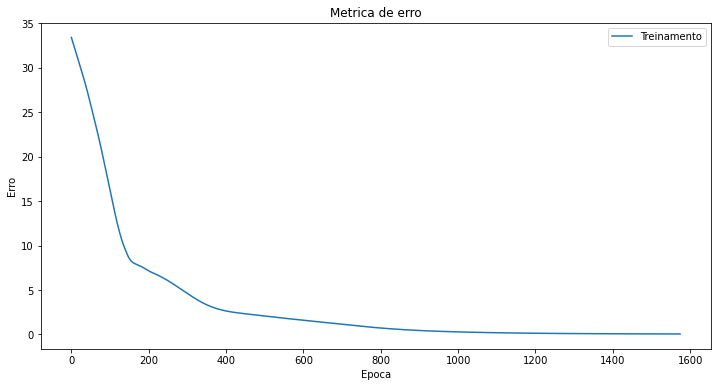

In [36]:
plt.figure(figsize=(12,6))
plt.plot(regr.loss_curve_)
plt.plot
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [37]:
print('Error atual:',regr.loss_)
print('Melhor erro:',regr.best_loss_)

Error atual: 0.04568095135731755
Melhor erro: 0.04568095135731755


In [38]:
x_train_pred = regr.predict(X_train.reshape(-1,1))
x_test_pred = regr.predict(X_test.reshape(-1,1))

### como a biblioteca não fornece a curva de erro para validação então eu usei o erro no teste e o erro no train para saber se havia over-fit


In [39]:
print(f"X_train MSE : {0.5*np.mean((y_train-x_train_pred)**2)}")
print(f"X_test MSE : {0.5*np.mean((y_test-x_test_pred)**2)}")

X_train MSE : 0.04554827914954089
X_test MSE : 0.07129011675096862


In [40]:
y_pred = regr.predict(X_test.reshape(-1,1))

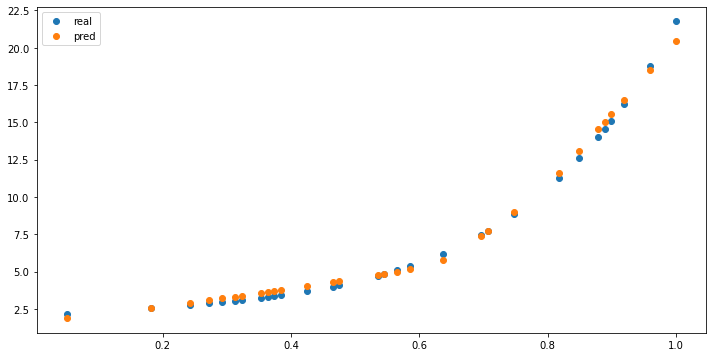

In [41]:
#corrigido para o intervalo de 0 a 20
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,label = 'real')
plt.scatter(X_test,y_pred,label = 'pred')
plt.legend(loc='best')
plt.show()

# Questão 3

In [42]:
def create_data_3(rangex):
    x = np.random.uniform(-1,1,rangex)
    y = np.random.uniform(-1,1,rangex)
    
    data = pd.DataFramepd.DataFrame(data={'x':[0.1], 'y': [0.1], 'class': [0]})
    

In [43]:
def gerador(n_exemplos):
    #gerando dados aleatorios sem classe
    x = np.random.uniform(-1,1,n_exemplos)
    y = np.random.uniform(-1,1,n_exemplos)
    
    #cirando dataframe para adicionar as classes e classificar os dados
    dados = pd.DataFrame(data={'x':[0.1], 'y': [0.1], 'Class': [0]})
    
    #adicionando os dados ao final do dataframe e dando uma classe a eles
    for i in range(n_exemplos):
        if ( y[i] <= 1 - x[i] and x[i] >= 0 and y[i] >= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],0]
            
        elif ( y[i] <= x[i] + 1 and x[i] <= 0 and y[i]>=0 ):
            dados.loc[len(dados)] = [x[i],y[i],1]
            
        elif ( y[i] >= -x[i] - 1 and x[i] <= 0 and y[i] <= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],2]
            
        elif ( y[i] >= x[i] - 1 and x[i] >= 0 and y[i] <= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],3]
            
        elif ( y[i] >= 1 - x[i] and x[i] >= 0 and y[i] >= 0  and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],4]
            
        elif ( y[i] >= x[i] + 1 and x[i] <= 0 and y[i]>=0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],5]
            
        elif ( y[i] <= -x[i] - 1 and x[i] <= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],6]
            
        elif ( y[i] <= x[i] - 1 and x[i] >= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],7]
        #dados restantes que não se encaixam nas retas
        '''else:
            dados.loc[len(dados)] = [x[i],y[i],8]
            '''
    return dados

In [44]:
dados_circulo = gerador(5000)

In [45]:
dados_circulo.head()

,x,y,Class
0,0.100000,0.100000,0.0
1,-0.166466,-0.961103,6.0
2,0.322890,0.817632,4.0
3,0.158332,-0.431982,3.0
4,0.349285,-0.796120,7.0


In [46]:
def plot2d(df):
    
    classes = df['Class'].unique()
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    
    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y = valores[:,0] , valores[:,1]
        ax.scatter(x,y, label=classe)
    
    #círculo
    theta = np.linspace( 0 , 2 * np.pi , 100) 
  
    raio = 1
  
    a = raio * np.cos( theta ) 
    b = raio * np.sin( theta ) 
    
    #reta 1
    x1 = np.linspace(0,1,100)
    f1 = lambda x: 1 - x
    y1 = f1(x1)
    
    #reta 2
    x2 = np.linspace(-1,0,100)
    f2 = lambda x: 1 + x
    y2 = f2(x2)
    
    #reta 3
    x3 = np.linspace(-1,0,100)
    f3 = lambda x: - 1 - x
    y3 = f3(x3)
    
    #reta 4
    x4 = np.linspace(0,1,100)
    f4 = lambda x: x - 1
    y4 = f4(x4)
    
    #eixo x e y
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    
    ax.plot(a,b, x1,y1, x2,y2, x3,y3 , x4,y4, c='black')
    ax.plot(np.zeros((100,)),y, x,np.zeros((100,)) ,c='black')
    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")



In [47]:
len(dados_circulo)

3918

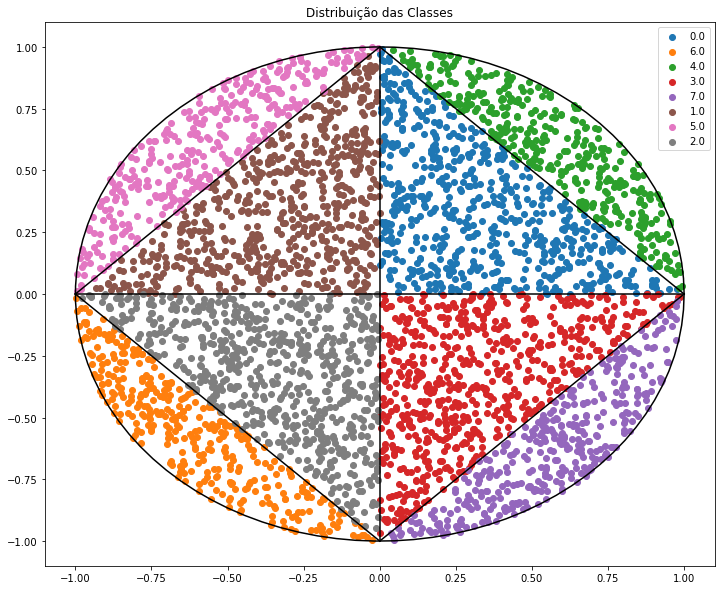

In [48]:
plot2d(dados_circulo)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dados_circulo[['x','y']].values,dados_circulo[['Class']].values, test_size=0.3)

In [50]:
one = OneHotEncoder(sparse=False)

In [51]:
y_train = one.fit_transform(y_train)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

### Sem regra do momento

In [52]:
regr = MLPRegressor( max_iter=3000,momentum=0.0).fit(X_train, y_train)

y_pred = regr.predict(X_test)
pred = np.argmax(y_pred, axis=1)# posição do maior valor

print(classification_report(y_test,pred))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       183
         1.0       0.97      0.99      0.98       185
         2.0       0.95      0.98      0.97       192
         3.0       0.97      0.95      0.96       177
         4.0       0.95      1.00      0.97       108
         5.0       0.98      0.97      0.98       115
         6.0       0.97      0.94      0.95       109
         7.0       0.96      0.95      0.96       107

    accuracy                           0.97      1176
   macro avg       0.97      0.97      0.97      1176
weighted avg       0.97      0.97      0.97      1176

Matriz de Confusão: 

[[172   2   0   1   6   2   0   0]
 [  0 183   2   0   0   0   0   0]
 [  0   1 188   0   0   0   3   0]
 [  4   0   0 169   0   0   0   4]
 [  0   0   0   0 108   0   0   0]
 [  0   3   0   0   0 112   0   0]
 [  0   0   7   0   0   0 102   0]
 [  0   0   0   5   0   0   0 102]]


In [53]:
pred

array([5, 7, 1, ..., 2, 6, 1], dtype=int64)

In [54]:
y_pred[0]

array([ 0.0314963 ,  0.21263955,  0.1767484 , -0.02211155, -0.01562119,
        0.5010248 ,  0.02421815,  0.03989136])

In [55]:
y_test

array([[5.],
       [7.],
       [1.],
       ...,
       [2.],
       [6.],
       [1.]])

### Com regra do momento


In [56]:
regr = MLPRegressor( max_iter=3000, momentum=0.9).fit(X_train, y_train)

y_pred = regr.predict(X_test)

pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test,pred))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       183
         1.0       0.96      0.98      0.97       185
         2.0       0.92      0.96      0.94       192
         3.0       0.96      0.96      0.96       177
         4.0       0.91      1.00      0.95       108
         5.0       1.00      0.96      0.98       115
         6.0       0.93      0.92      0.92       109
         7.0       0.97      0.95      0.96       107

    accuracy                           0.95      1176
   macro avg       0.96      0.96      0.95      1176
weighted avg       0.96      0.95      0.96      1176

Matriz de Confusão: 

[[168   3   0   2  10   0   0   0]
 [  0 181   4   0   0   0   0   0]
 [  0   0 184   1   0   0   7   0]
 [  0   0   3 170   1   0   0   3]
 [  0   0   0   0 108   0   0   0]
 [  0   4   0   0   0 110   1   0]
 [  0   0   9   0   0   0 100   0]
 [  0   0   0   5   0   0   0 102]]


# Questão 4

In [57]:
f = lambda x : np.sin(x)**2 + np.cos(x + np.cos(x))

In [58]:
x = np.arange(0,100)
data = pd.DataFrame(f(x), index=x, columns=["f(x)"])

<AxesSubplot:>

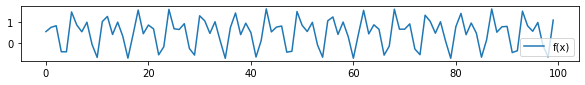

In [59]:
data.plot(figsize=(10,1))

In [60]:
data

,f(x)
0,0.540302
1,0.738563
2,0.813765
3,-0.405311
4,-0.406359
...,...
95,0.555134
96,0.966451
97,-0.109378
98,-0.649542


In [61]:
def gen_st(data,time):
    new_data = pd.DataFrame()
    for i in range(time,0,-1):
        new_data[f'x_{(time+1)-i}'] = data.shift(i)
    new_data = new_data.iloc[time:]
    return new_data

In [62]:
time = 10

In [63]:
new_data = gen_st(data['f(x)'],time)

In [64]:
new_data

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
10,0.540302,0.738563,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893
11,0.738563,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434
12,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832
13,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658
14,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658,0.404245
...,...,...,...,...,...,...,...,...,...,...
95,-0.660392,0.151278,1.598441,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846
96,0.151278,1.598441,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846,0.555134
97,1.598441,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846,0.555134,0.966451
98,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846,0.555134,0.966451,-0.109378


In [65]:
X = new_data[[f'x_{i}' for i in range(1,8)]].values
y = new_data[['x_8','x_9','x_10']].values
rangex =len(X)

X_train, y_train = X[:int(len(x)/10)*7],y[:int(len(x)/10)*7:]
X_test, y_test = X[int(len(x)/10)*7:], y[int(len(x)/10)*7:] 

In [66]:
len(X)

90

In [67]:
len(X_test)

20

In [68]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [69]:
y_pred = regr.predict(X_test)

### Plot 1  sem sobreposição da predição sobre a f(x)

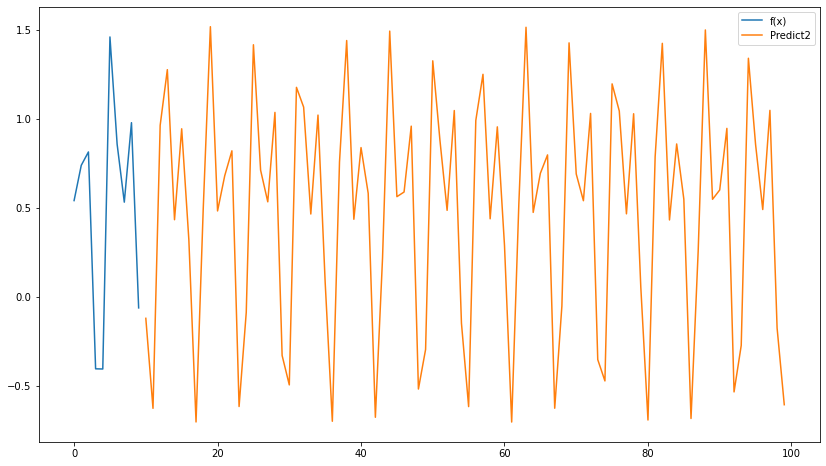

In [70]:
figure = plt.figure(figsize=(14,8))
axis = figure.add_subplot(111)

axis.plot(x[:10],f(x[:10]), label='f(x)')

#axis.plot(x[10:], regr.predict(X)[:,0],'--',color = 'orange',label='Predict' )#
#axis.plot(x[10:], regr.predict(X)[:,1],label='Predict1' )
axis.plot(x[10:], regr.predict(X)[:,2],label='Predict2' )
axis.legend(loc='best')

### Plot 2 sobrendo as funções f(x) real vs previsão de f(x)

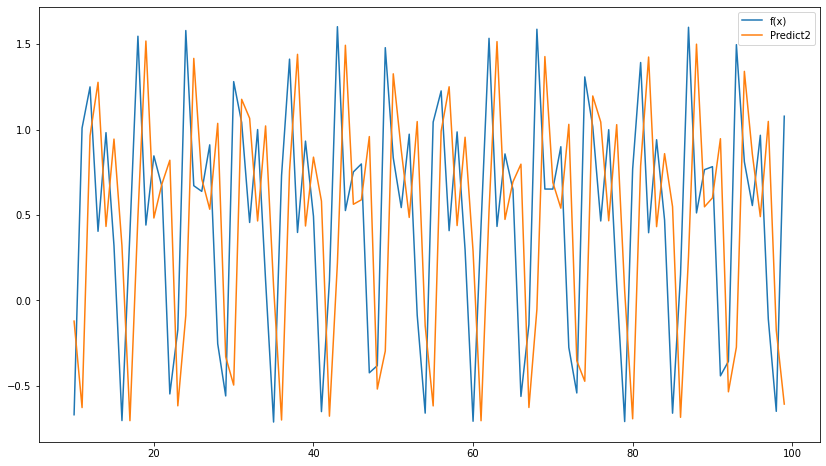

In [71]:
figure = plt.figure(figsize=(14,8))
axis = figure.add_subplot(111)

axis.plot(x[10:],f(x[10:]), label='f(x)')

#axis.plot(x[10:], regr.predict(X)[:,0],'--',color = 'orange',label='Predict' )#
#axis.plot(x[10:], regr.predict(X)[:,1],label='Predict1' )
axis.plot(x[10:], regr.predict(X)[:,2],label='Predict2' )
axis.legend(loc='best')

In [72]:
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)}")#Erro Quadrático Médio

MSE: 0.0019250900732157815
